# Drifter data
1) Get data from opendap
2) Output GeoJson with locations and timestamp

In [122]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import netCDF4 as nc
import geojson
import json
import urllib
import re
import datetime

## 1) Get dataset from opendap

In [102]:
urls = []
urls.append(r'http://opendap.tudelft.nl/thredds/dodsC/data2/zandmotor/meteohydro/hydrodynamics/drifters/ebb_01_10_2014.nc')
urls.append(r'http://opendap.tudelft.nl/thredds/dodsC/data2/zandmotor/meteohydro/hydrodynamics/drifters/ebb_02_10_2014.nc')
urls.append(r'http://opendap.tudelft.nl/thredds/dodsC/data2/zandmotor/meteohydro/hydrodynamics/drifters/ebb_13_10_2014.nc')
urls.append(r'http://opendap.tudelft.nl/thredds/dodsC/data2/zandmotor/meteohydro/hydrodynamics/drifters/ebb_15_10_2014.nc')
urls.append(r'http://opendap.tudelft.nl/thredds/dodsC/data2/zandmotor/meteohydro/hydrodynamics/drifters/ebb_17_10_2014.nc')
urls.append(r'http://opendap.tudelft.nl/thredds/dodsC/data2/zandmotor/meteohydro/hydrodynamics/drifters/ebb_23_09_2014.nc')
urls.append(r'http://opendap.tudelft.nl/thredds/dodsC/data2/zandmotor/meteohydro/hydrodynamics/drifters/ebb_30_09_2014.nc')
urls.append(r'http://opendap.tudelft.nl/thredds/dodsC/data2/zandmotor/meteohydro/hydrodynamics/drifters/flood_01_10_2014.nc')
urls.append(r'http://opendap.tudelft.nl/thredds/dodsC/data2/zandmotor/meteohydro/hydrodynamics/drifters/flood_02_10_2014.nc')
urls.append(r'http://opendap.tudelft.nl/thredds/dodsC/data2/zandmotor/meteohydro/hydrodynamics/drifters/flood_13_10_2014.nc')
urls.append(r'http://opendap.tudelft.nl/thredds/dodsC/data2/zandmotor/meteohydro/hydrodynamics/drifters/flood_15_10_2014.nc')
urls.append(r'http://opendap.tudelft.nl/thredds/dodsC/data2/zandmotor/meteohydro/hydrodynamics/drifters/flood_17_10_2014.nc')
urls.append(r'http://opendap.tudelft.nl/thredds/dodsC/data2/zandmotor/meteohydro/hydrodynamics/drifters/flood_18_10_2014.nc')
urls.append(r'http://opendap.tudelft.nl/thredds/dodsC/data2/zandmotor/meteohydro/hydrodynamics/drifters/flood_23_09_2014.nc')
urls.append(r'http://opendap.tudelft.nl/thredds/dodsC/data2/zandmotor/meteohydro/hydrodynamics/drifters/flood_30_09_2014.nc')

print(len(urls))

15


processing http://opendap.tudelft.nl/thredds/dodsC/data2/zandmotor/meteohydro/hydrodynamics/drifters/ebb_01_10_2014.nc
drifters_ebb_01_10_2014
processing http://opendap.tudelft.nl/thredds/dodsC/data2/zandmotor/meteohydro/hydrodynamics/drifters/ebb_02_10_2014.nc
drifters_ebb_02_10_2014
processing http://opendap.tudelft.nl/thredds/dodsC/data2/zandmotor/meteohydro/hydrodynamics/drifters/ebb_13_10_2014.nc
drifters_ebb_13_10_2014
processing http://opendap.tudelft.nl/thredds/dodsC/data2/zandmotor/meteohydro/hydrodynamics/drifters/ebb_15_10_2014.nc
drifters_ebb_15_10_2014
processing http://opendap.tudelft.nl/thredds/dodsC/data2/zandmotor/meteohydro/hydrodynamics/drifters/ebb_17_10_2014.nc
drifters_ebb_17_10_2014
processing http://opendap.tudelft.nl/thredds/dodsC/data2/zandmotor/meteohydro/hydrodynamics/drifters/ebb_23_09_2014.nc
drifters_ebb_23_09_2014
processing http://opendap.tudelft.nl/thredds/dodsC/data2/zandmotor/meteohydro/hydrodynamics/drifters/ebb_30_09_2014.nc
drifters_ebb_30_09_2014

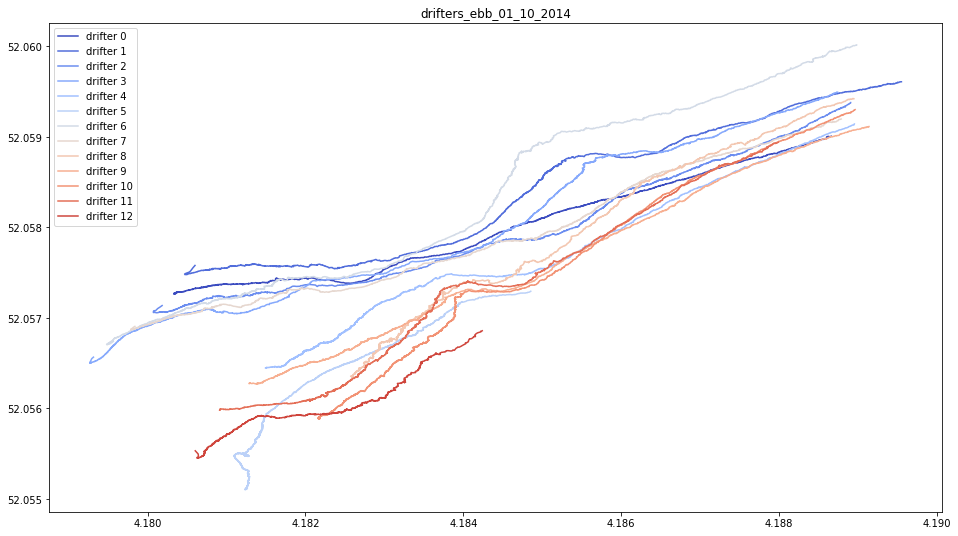

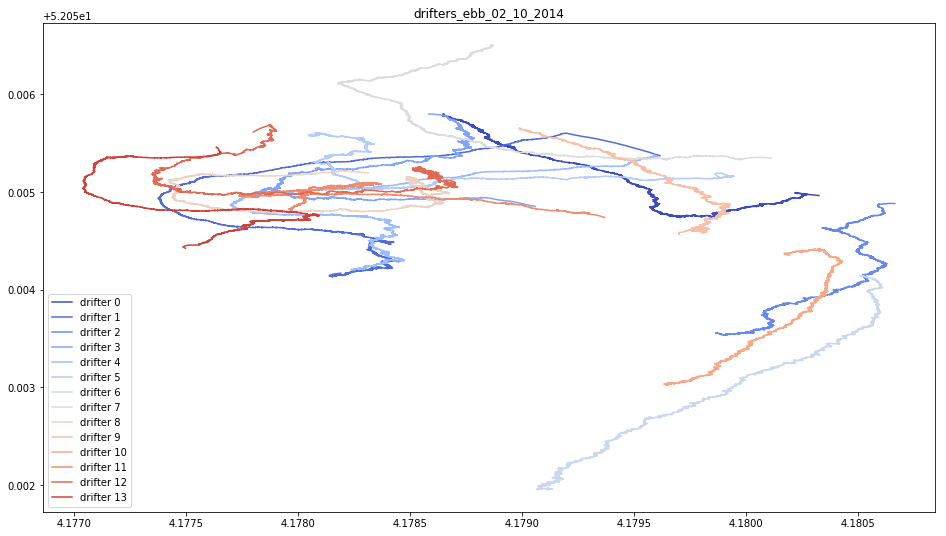

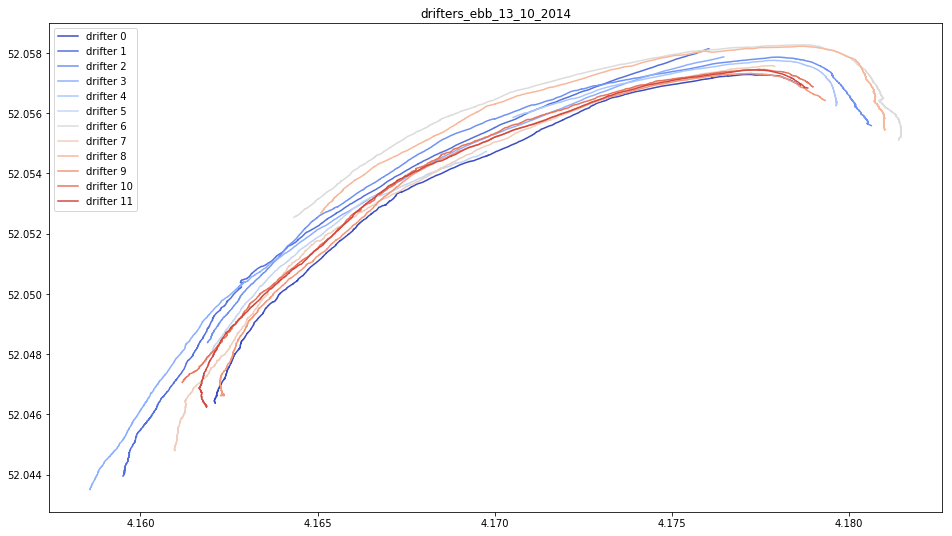

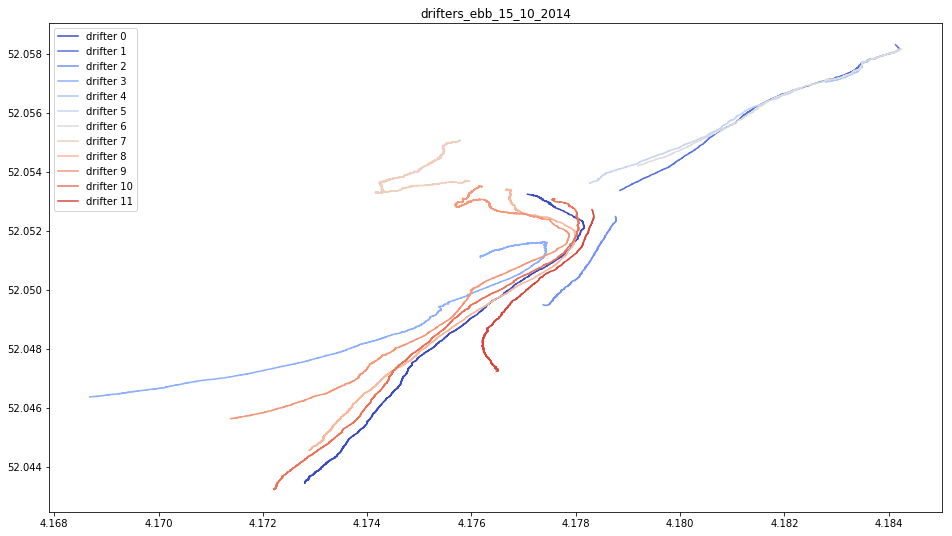

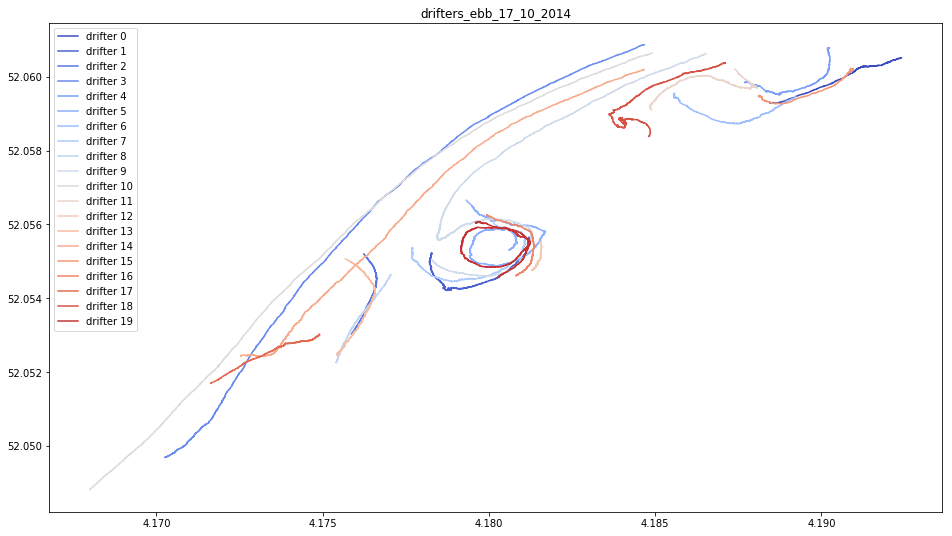

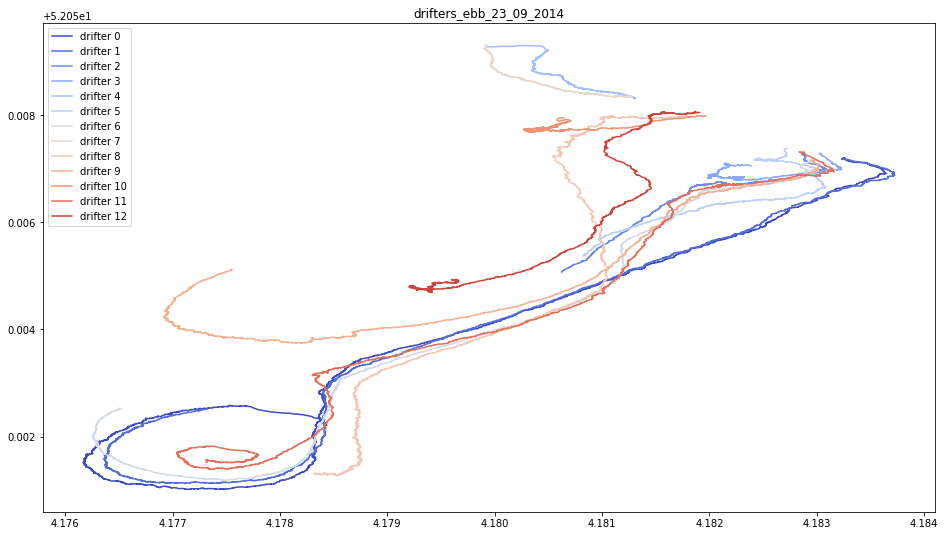

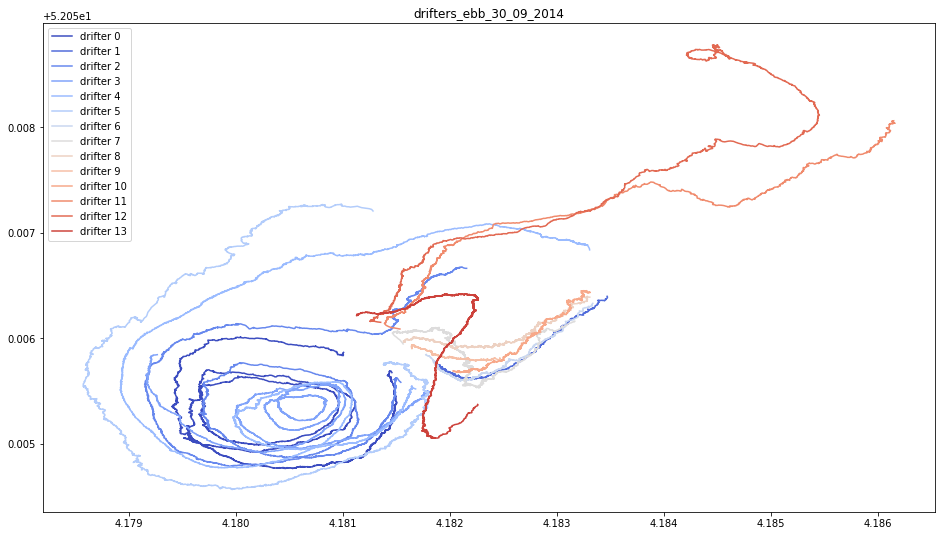

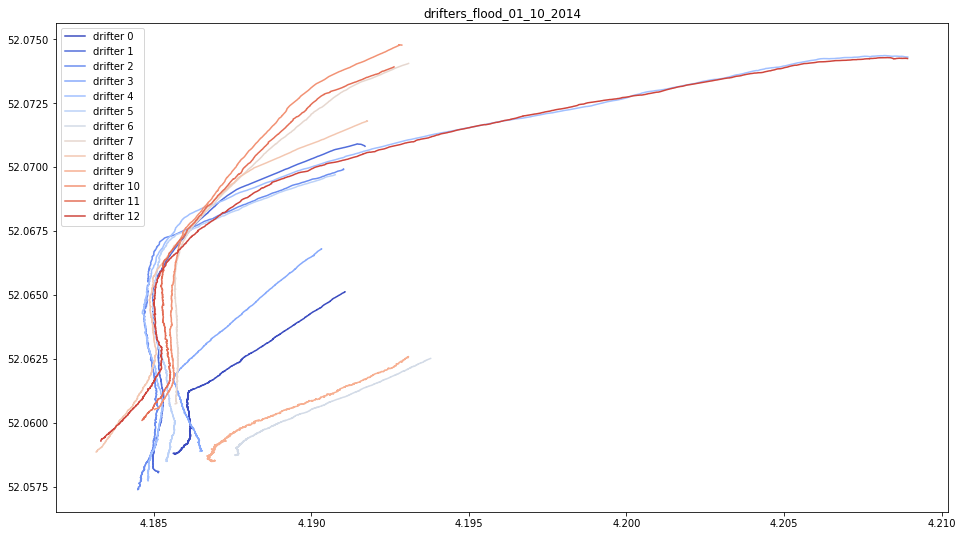

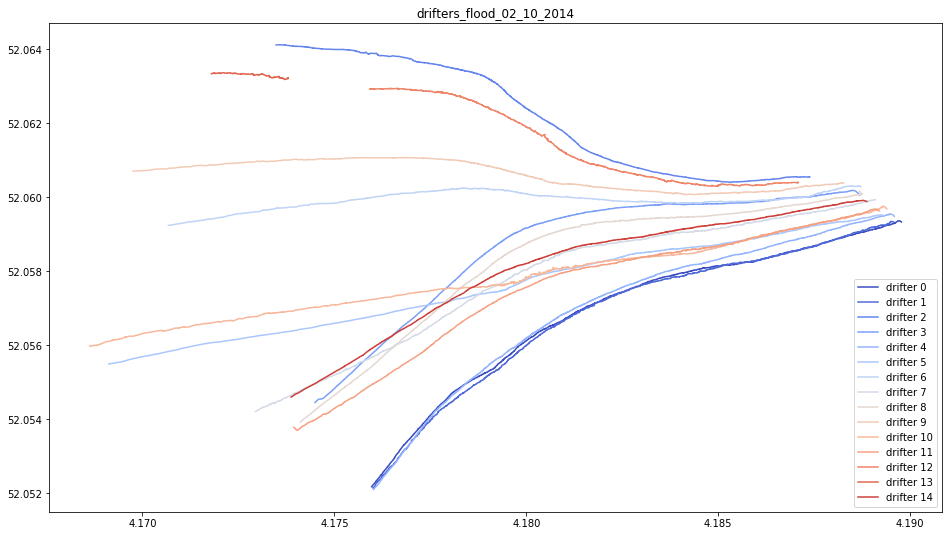

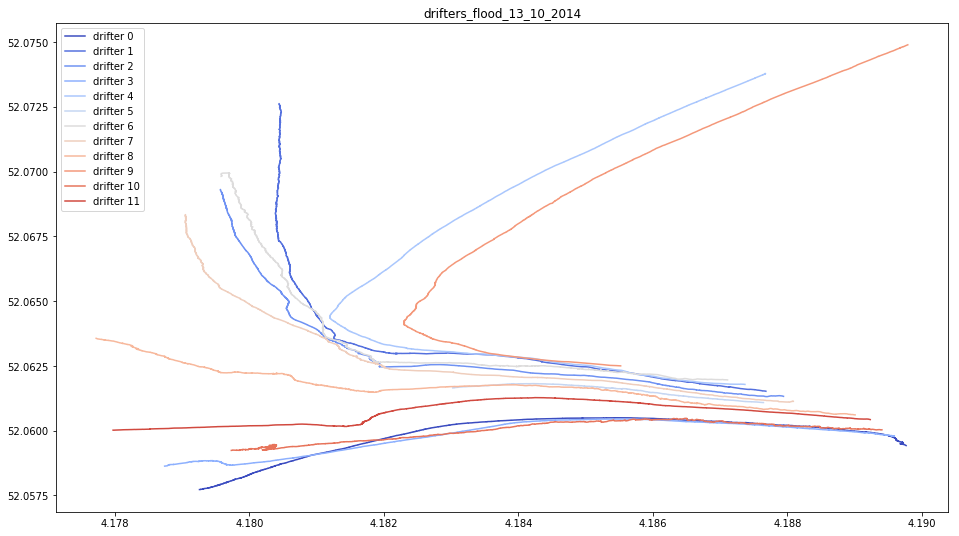

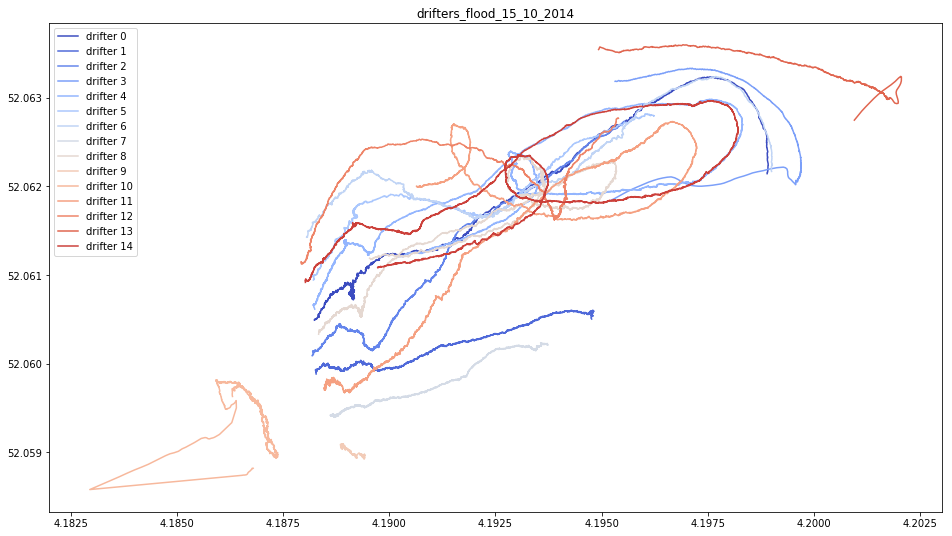

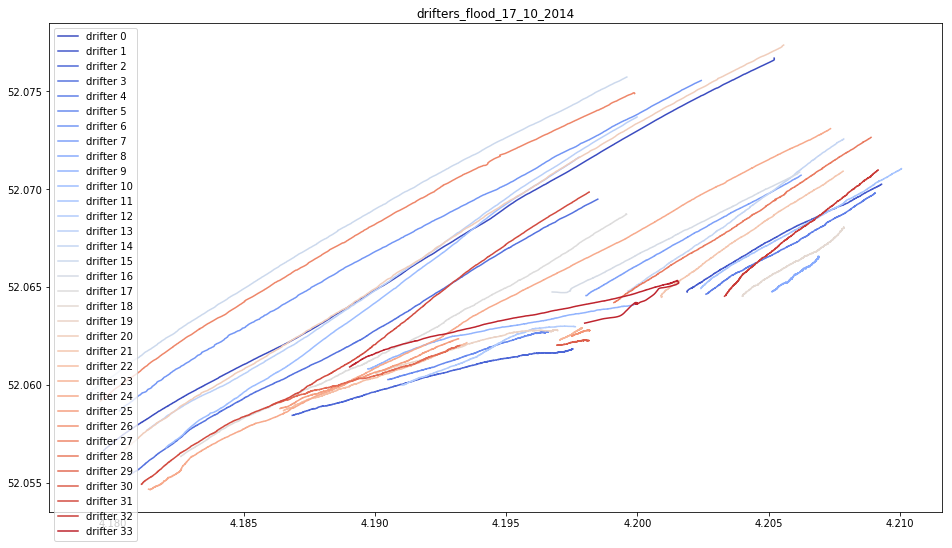

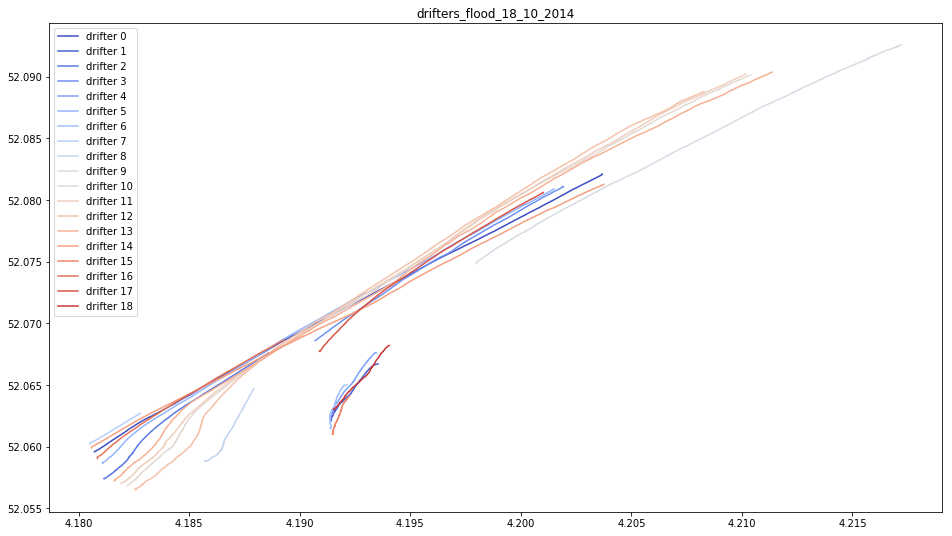

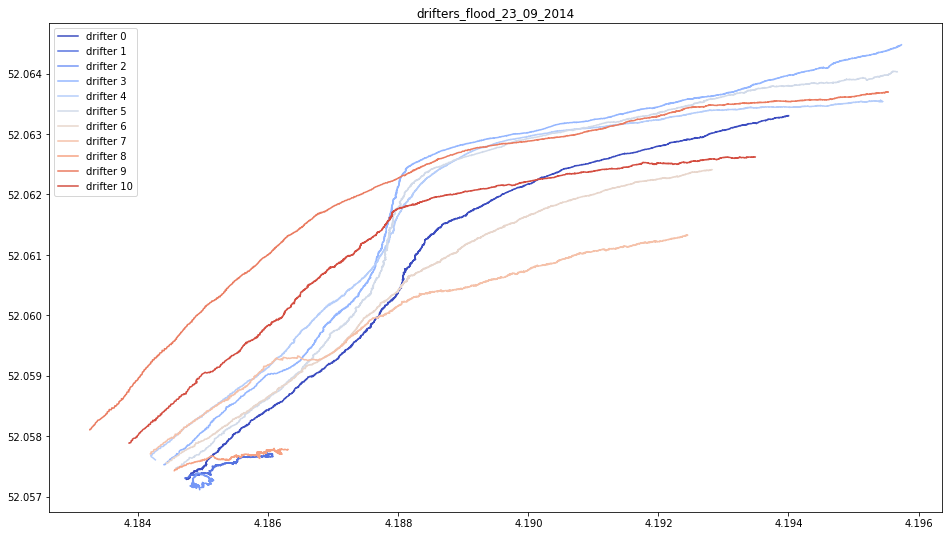

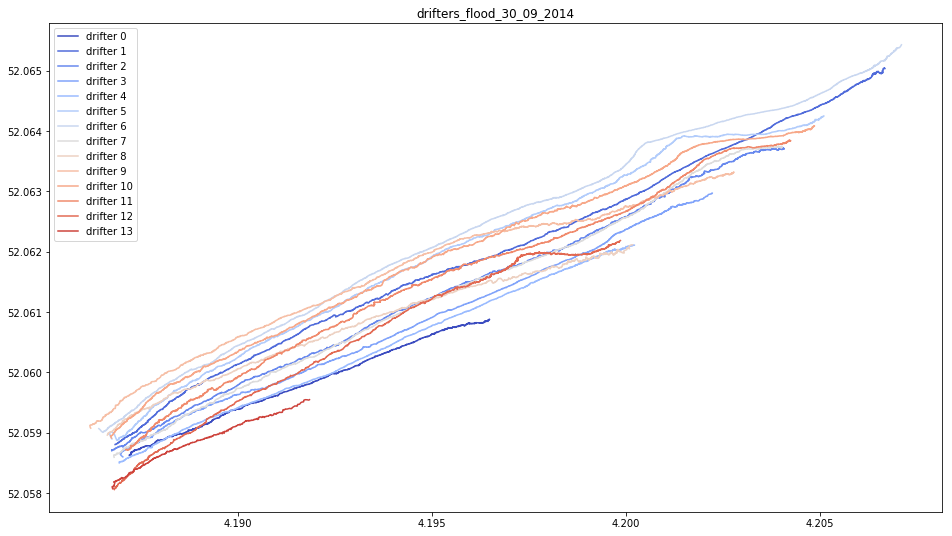

In [127]:
cmap = matplotlib.cm.get_cmap('coolwarm')
features = []
for url in urls:
    print('processing', url)
    dataset = nc.Dataset(url)
    dataset.set_auto_mask(False)

    # get deployment name
    deploymentID = dataset.id

    print(deploymentID)
    plt.figure(figsize=(16,9))
    plt.title(deploymentID)

    for i in range(np.shape(dataset['lat'])[1]):

        lat = dataset['lat'][:,i] # [locations, drifter]
        lat = lat[~np.isnan(lat)].tolist()
        lon = dataset['lon'][:,i]
        lon = lon[~np.isnan(lon)].tolist()

        time = dataset['time'][:,i]
        time = time[~np.isnan(time)].tolist()
        for j in range(len(time)):
            time[j] = int(time[j])

        trajectory = geojson.LineString(coordinates= (zip(lon,lat)))
        color = matplotlib.colors.to_hex(cmap(i/float(np.shape(dataset['lat'])[1])))

        p = plt.plot(lon, lat, label='%s %i' %('drifter',i),c=color)
        features.append(geojson.Feature(geometry=trajectory, properties=({'timestamp':time,
                                                                          'deploymentId':deploymentID,
                                                                          'color':color})))
    plt.legend()
    
# to json
f = open('%s/%s%s' %('../static', 'Drifters', '.geojson'),'w')
f.write(json.dumps(geojson.FeatureCollection(features),indent=4))
f.close()